In [172]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.4
pandas version :  1.2.3
seaborn version :  0.11.2


In [173]:
df = pd.read_csv('dataset.csv')
df

Administrative  Administrative_Duration  Informational  \
0                 0.0                 0.000000              0   
1                 0.0                 0.000000              0   
2                 0.0                 0.000000              0   
3                 0.0                      NaN              0   
4                 0.0                 0.000000              0   
...               ...                      ...            ...   
12941             0.0                 0.000000              0   
12942             0.0                 0.000000              0   
12943            14.0               484.461579              2   
12944             3.0                60.833333              0   
12945             0.0                 0.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12941                     0.0               2                 0.000000   
12942                     0.0              59              1309.658333   
12943                    14.0              33               898.491579   
12944                     0.0              18               884.633333   
12945                     0.0               6               241.000000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000         0.0         0.0   Feb               1.0   
1         0.000000   0.100000         0.0         0.0   Feb               2.0   
2         0.200000   0.200000         0.0         0.0   Feb               4.0   
3         0.050000   0.140000         0.0         0.0   Feb               3.0   
4         0.020000   0.050000         0.0         0.0   Feb               3.0   
...            ...        ...         ...         ...   ...               ...   
12941     0.200000   0.200000         0.0         0.0   Nov               3.0   
12942     0.017241   0.030879         0.0         0.0   Dec               3.0   
12943     0.004269   0.034661         0.0         0.0   Sep               1.0   
12944     0.021053   0.041140         0.0         0.0   Mar               2.0   
12945     0.000000   0.033333         0.0         0.0   May               2.0   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12941        2       1           13  Returning_Visitor    False    False  
12942        2       3            1  Returning_Visitor    False    False  
12943        8       1            3  Returning_Visitor    False    False  
12944        2       3           10  Returning_Visitor    False    False  
12945       10       2            3  Returning_Visitor    False    False  

[12946 rows x 18 columns]

# Descriptive Analysis

### 1. Tuliskan hasil observasi.  
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?  
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?  
C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [175]:
kategori = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
numerikal = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',  
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
date = ['Month']

data dibagi menjadi 3 tipe, yaitu kategori, numerik, dan date

Terdapat beberapa tipe data yang kurang sesuai, seperti Region, traffictype, browser, operating system yang harusnya bertipe data object. Bisa diganti tipe datanya saat praproses data.

In [176]:
df[kategori].astype('object').describe()

OperatingSystems  Browser  Region  TrafficType        VisitorType  \
count            12422.0    12946   12946        12946              12946   
unique               8.0       13       9           20                  3   
top                  2.0        2       1            2  Returning_Visitor   
freq              6673.0     8360    5031         4100              11072   

       Weekend Revenue  
count    12946   12946  
unique       2       2  
top      False   False  
freq      9929   10938

Data seperti operating system, browser, region, dan traffic type memiliki label yang kurang jelas. Bisa ditambahkan penjelasan label tersebut.  Berikut adalah pelabelan data :
  
- OperatingSystem : iOS (1.0), Windows (2.0), Android (3.0), MAC OS (4.0), Linux (8.0),  Chrome Os (6.0), Unix (7.0), Blackberry OS (5.0).  
- Browser : Google Chrome (2), Microsoft Edge (5), Mozilla Firefox (4), Safari (1), Opera (12), Samsung Internet (6), Brave (8), UC Browser (10), DuckDuckGo (11), Internet Explorer (3), Netscape Navigator (13), Maxthon Browser (7), Vivaldi (9).  
- Region : Jakarta (1), Bandung (2), Surabaya (3), Medan (4), Batam (5), Makassar (6), Tangerang (7), Yogyakarta (8), Semarang (9).

In [177]:
df[numerikal].describe()

Administrative  Administrative_Duration  Informational  \
count    12835.000000             12313.000000   12946.000000   
mean         2.303857                80.370267       0.498841   
std          3.314427               175.494016       1.263276   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.000000       0.000000   
75%          4.000000                92.933333       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12946.000000    12946.000000             12307.000000   
mean                34.136048       31.657655              1192.740077   
std                140.022848       44.202635              1910.216261   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               182.083333   
50%                  0.000000       18.000000               599.583333   
75%                  0.000000       38.000000              1470.522917   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12872.000000  12946.000000  12946.000000  12946.000000  
mean       0.022309      0.043266      5.875963      0.061270  
std        0.048681      0.048808     18.414670      0.198667  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025329      0.000000      0.000000  
75%        0.016933      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

Beberapa data memiliki nilai mean yang sangat melebihi nilai mediannya. Hal ini dikarenakan fitur memiliki nilai outlier yang ekstrim.  
- Pada kolom 'adminstrative' nilai Mean (2.3), Median (1), Q3 (4), dan  Max (27).  
- Pada kolom 'administrative_duration' Mean (80.37), Median (7), Q3 (92.93) dan Max (3398.75) memiliki perbedaan yang signifikan.  
- Pada kolom 'informational' Q3 (0) dan Max (24), Mean (0.4), Median (0) memiliki nilai tidak signifikan.  
- Pada kolom 'informational_duration' Mean (34.13), Median (0) dan Q3(0), Max(2549) memiliki nilai berbeda signifikan.  
- Pada kolom 'productrelated' Mean (31.65), Median (18) memiliki jarak yang agak jauh dan Q3 (38) dengan Max (705) memiliki nilai yang berbeda signifikan.  
- Pada kolom 'productrelated_duration' memiliki nilai Mean (1192.7), Median (599.5), Q3(1470.5), dan Max (63973.5), memiliki perbedaan yang signifikan.  
- Pada kolom ‘pagevalues’ Min-Q3 benilai 0 dan memiliki nilai Max 361.763742   


In [178]:
df[date].value_counts()

Month
May      3533
Nov      3151
Mar      1997
Dec      1816
Oct       574
Sep       464
Aug       461
Jul       451
June      308
Feb       191
dtype: int64

Kolom month tidak mengandung data pada bulan Januari dan April. Kemungkinan karena kesalahan pada pengambilan data atau data yang memang tidak lengkap.

In [179]:
df.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

ada lima kolom yang mengandung nilai null, yaitu :  
- Administrative: 111 nilai kosong  
- Administrative_Duration: 633 nilai kosong  
- ProductRelated_Duration: 639 nilai kosong  
- BounceRates: 74 nilai kosong  
- OperatingSystems: 524 nilai kosong  
  
untuk tipe data numerik, data yang bersifat null akan diisi dengan nilai median. Hal ini dikarenakan ada outlier yang sangat ekstrim sehingga nilai mean berada jauh diaatas median.  
  
untuk tipe data kategorik, data bisa didrop karena tidak terlalu memengaruhi analisis datanya.

In [180]:
df.duplicated().sum()

711

Ada 711 baris data yang duplikat. Data yang duplikat bisa dihapus dan disisakan data paling awal muncul saat praproses data.

# Univariate Analysis

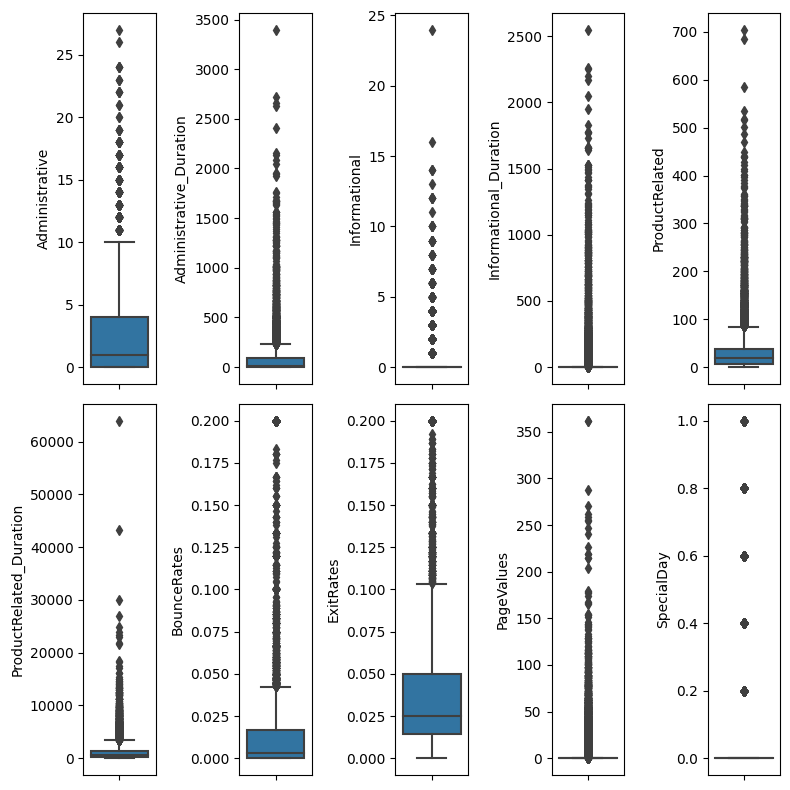

In [181]:
plt.figure(figsize=(8, 8))
for i in range(0,len(numerikal)):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=df[numerikal[i]],orient='v')
    plt.tight_layout()

hampir semua data numerik memiliki kasus outlier yang cukup ekstrim. Data outliers ini bisa kita hapus menggunakan teknik z-score atau IQR.

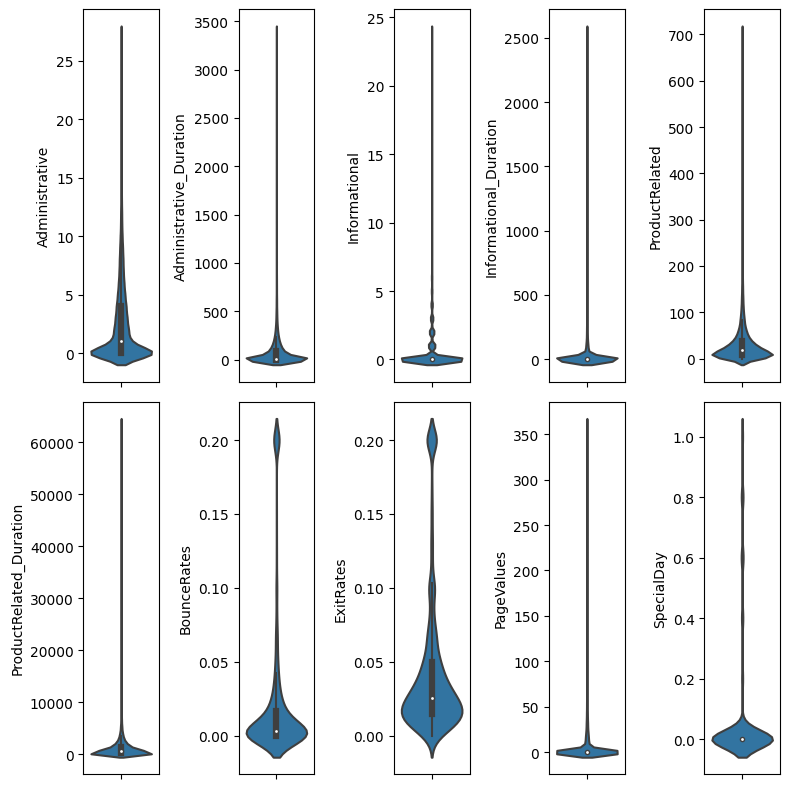

In [182]:
plt.figure(figsize=(8, 8))
for i in range(0,len(numerikal)):
    plt.subplot(2,5,i+1)
    sns.violinplot(y=df[numerikal[i]])
    plt.tight_layout()

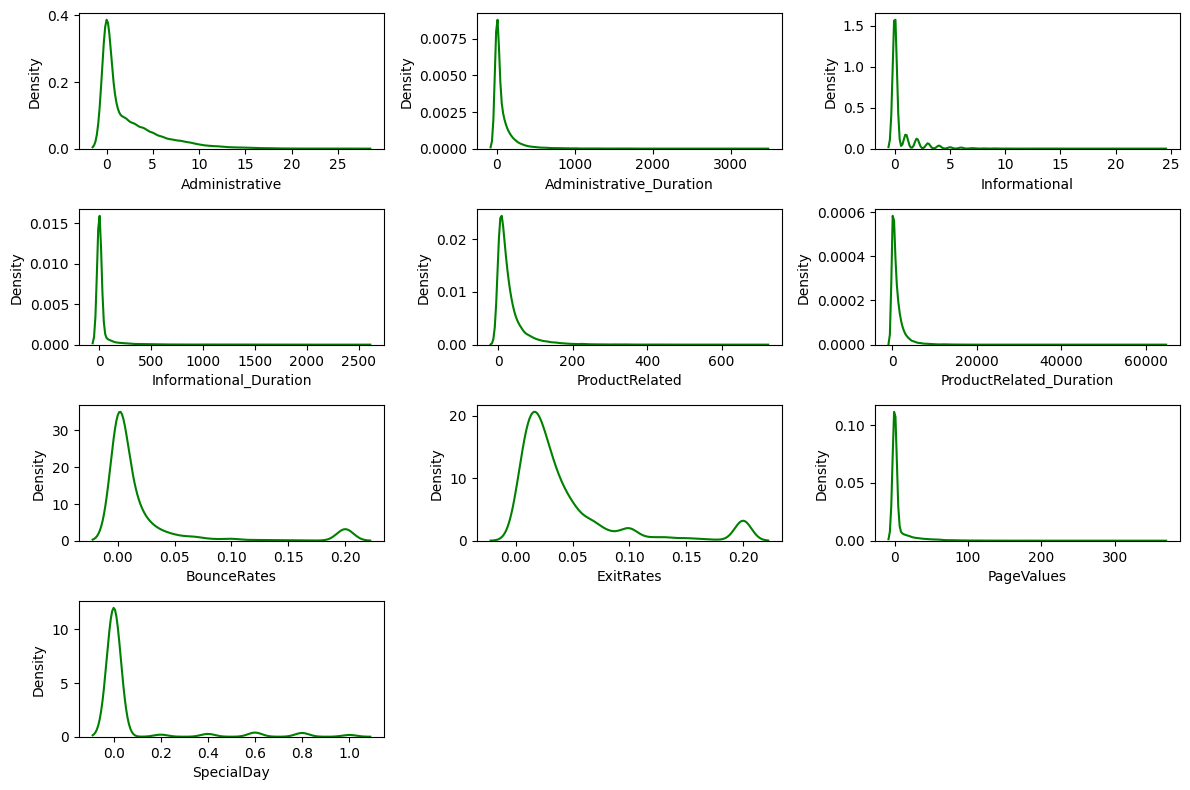

In [183]:
plt.figure(figsize=(12, 8))
for i in range(0,len(numerikal)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[numerikal[i]],color='green')
    plt.xlabel(numerikal[i])
    plt.tight_layout()

Semua data numerik memiliki nilai outlier yang tinggi di sebelah kanan. Hal ini membuat nilai mean menjadi tinggi sehingga menyebabkan grafik right-skewed. 

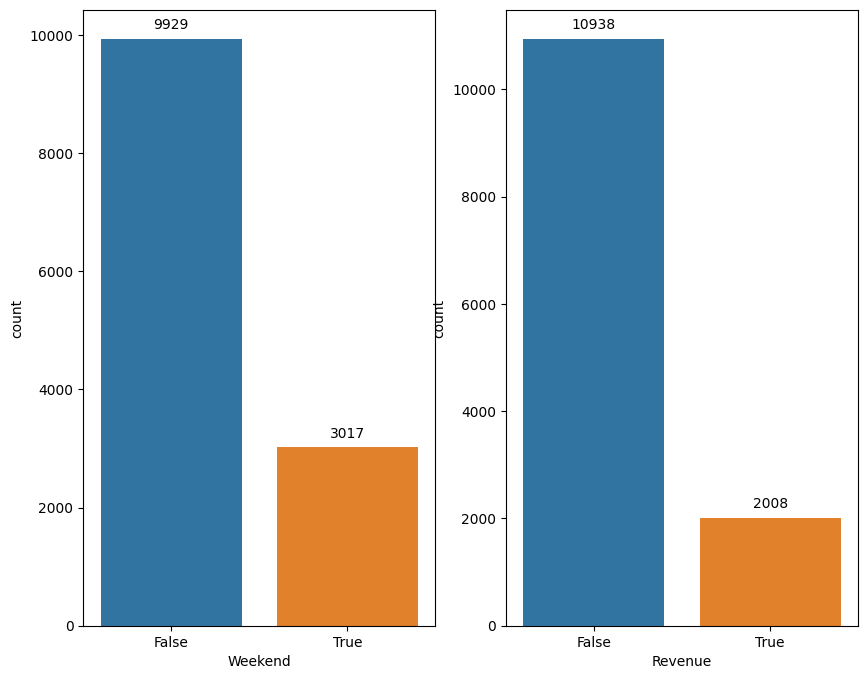

In [184]:
cat = ['Weekend', 'Revenue']

plt.figure(figsize=(10, 8))
for i in range(0,len(cat)):
    plt.subplot(1,len(cat),i+1)
    ax = sns.countplot(x=df[cat[i]].astype('object'))
    for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

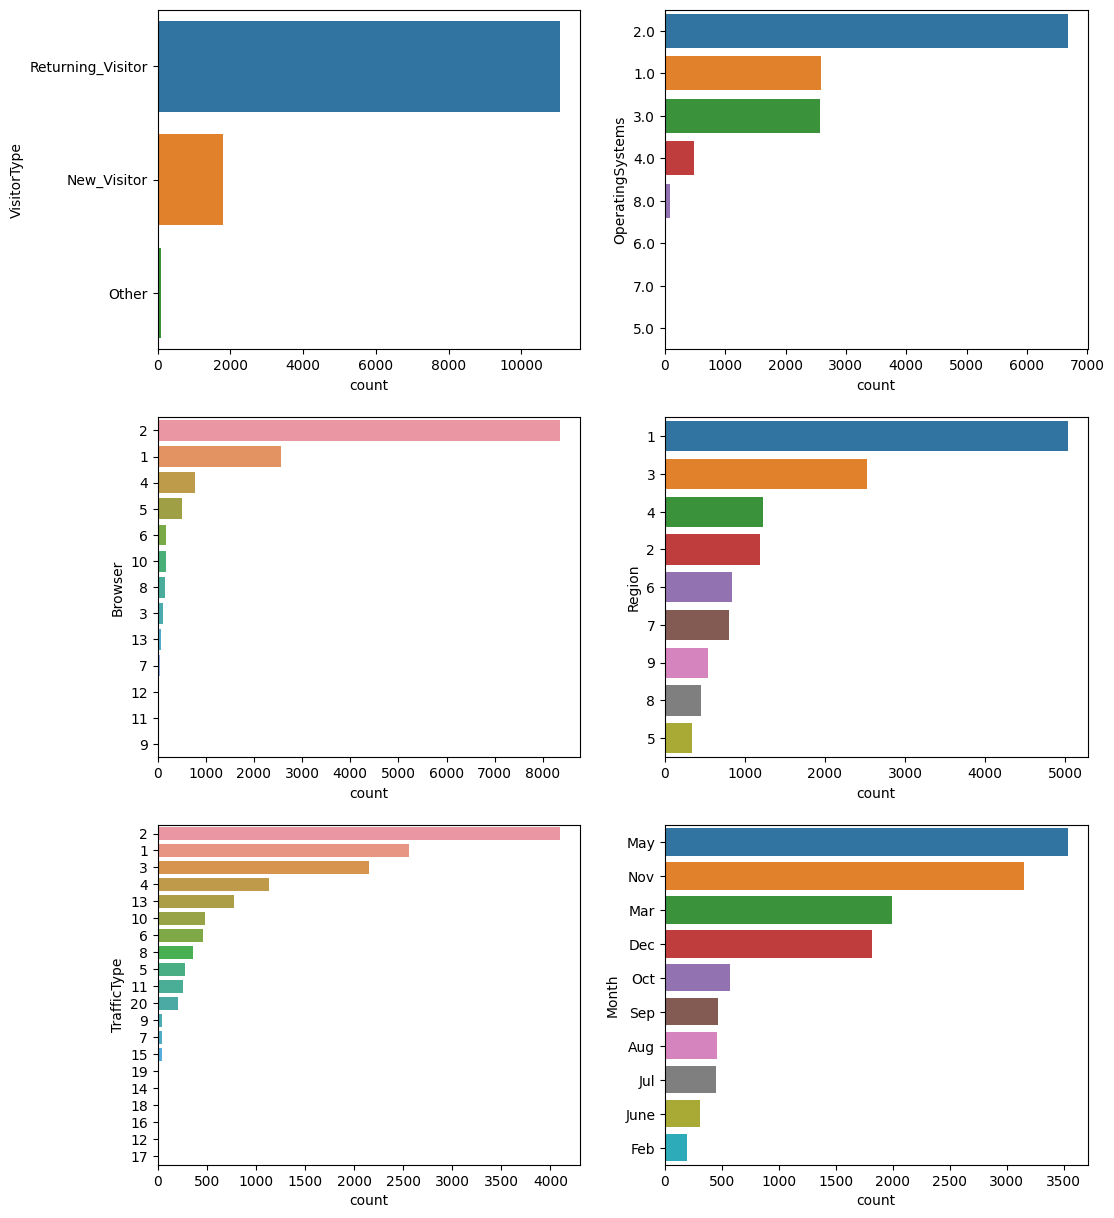

In [185]:
cat2 = ['VisitorType','OperatingSystems', 'Browser', 'Region', 'TrafficType','Month']

plt.figure(figsize=(12, 15))
for i in range(0,len(cat2)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cat2[i]].astype('object'),order = df[cat2[i]].astype('object').value_counts().index)

- Region : Jakarta (1), Bandung (2), Surabaya (3), Medan (4), Batam (5), Makassar (6), Tangerang (7), Yogyakarta(8), Semarang (9). 
- Browser : Safari (1), Google Chrome (2), Internet Explorer (3), Mozilla Firefox (4), Microsoft Edge (5),  Samsung Internet (6), Maxthon Browser (7) , Brave (8), Vivaldi (9) UC Browser (10), DuckDuckGo (11),  Opera (12), Netscape Navigator (13). 
- OperatingSystem : iOS (1.0), Windows (2.0), Android (3.0), MAC OS (4.0), Blackberry OS (5.0),  Chrome Os (6.0), Unix (7.0),  Linux (8.0), 
- Traffic type : Organic Search (1), Paid Search (2), Direct traffic (3), Social Media(4), Offline Sources (5), Referral Traffic (6),  Email Marketing (8), Display Advertising (10), Affiliate Marketing (13),




Untuk tipe kategorik, berikut adalah data dengan jumlah terbanyak :
- visitor type : returning visitor  
- Operating system : 2 (Windows)  
- browser : 2 (Google Chrome)  
- region : 1 (Jakarta)
- traffic type : 2   
- month : May
  
beberapa data memiliki count yang sangat kecil sehingga tidak muncul di graph seperti :  
- Operating system : 4 (Mac OS), 5 (Blackberry OS), 6 (Chrome OS), 7 (Unix), 8 
- browser : 7 (Maxthon), 9 (Vivaldi), 11 (DuckDuckGo), 12 (Opera), 13 (Netscape)  
- traffic type : 9,7,12,14,15,16,17,18,19  
  
data ini memiliki potensi untuk didrop atau digabung menjadi "other"


# Multivarate Analysis

<AxesSubplot:>

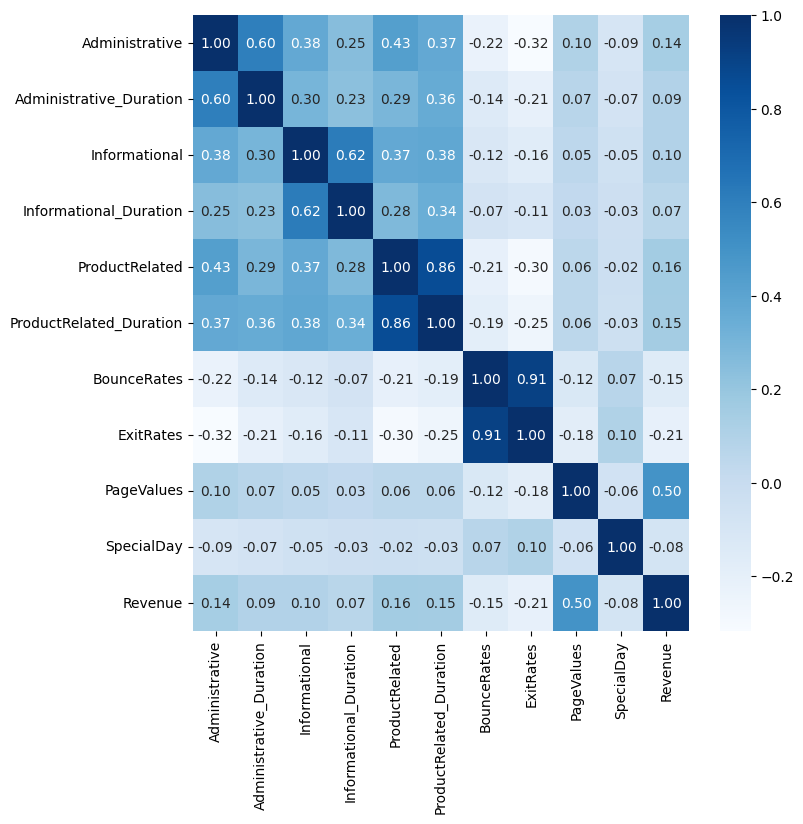

In [186]:
mult = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay','Revenue']

plt.figure(figsize=(8, 8))
sns.heatmap(df[mult].corr(),cmap='Blues',annot=True,fmt='.2f')

Dari correlation heatmap diatas, ada beberapa info yang bisa kita ambil :
- Ada dua relasi yang kuat, yaitu relasi productrelated - productrelated_duration sebesar 0.86 dan bouncerates - exitrares sebesar 0.91. 
- ada beberapa fitur independent yang memiliki relasi sangat rendah dengan fitur dependant, seperti administrative_duration ( 0.09), informational_duration (0.07), specialday(-0.08)
- Fitur PageValues memiliki nilai relasi tertinggi dengan fitur dependant (revenue), sehingga fitur ini harus dipertahankan.
  
Kita bisa men-drop salah satu fitur yang memiliki relasi yang kuat. Untuk mengetahui mana fitur yang didrop, bisa dilihat relasi fitur tersebut dengan fitur dependantnya (revenue). Fitur yang memiliki nilai korelasi yang lebih rendah akan didrop. Perbandingan bisa dilihat sebagai berikut :  
- productrelated (0.16) - productrelated_duration (0.15)
- bouncerates (-0.15) - exitrates (-0.21) 

<Figure size 1500x1500 with 0 Axes>

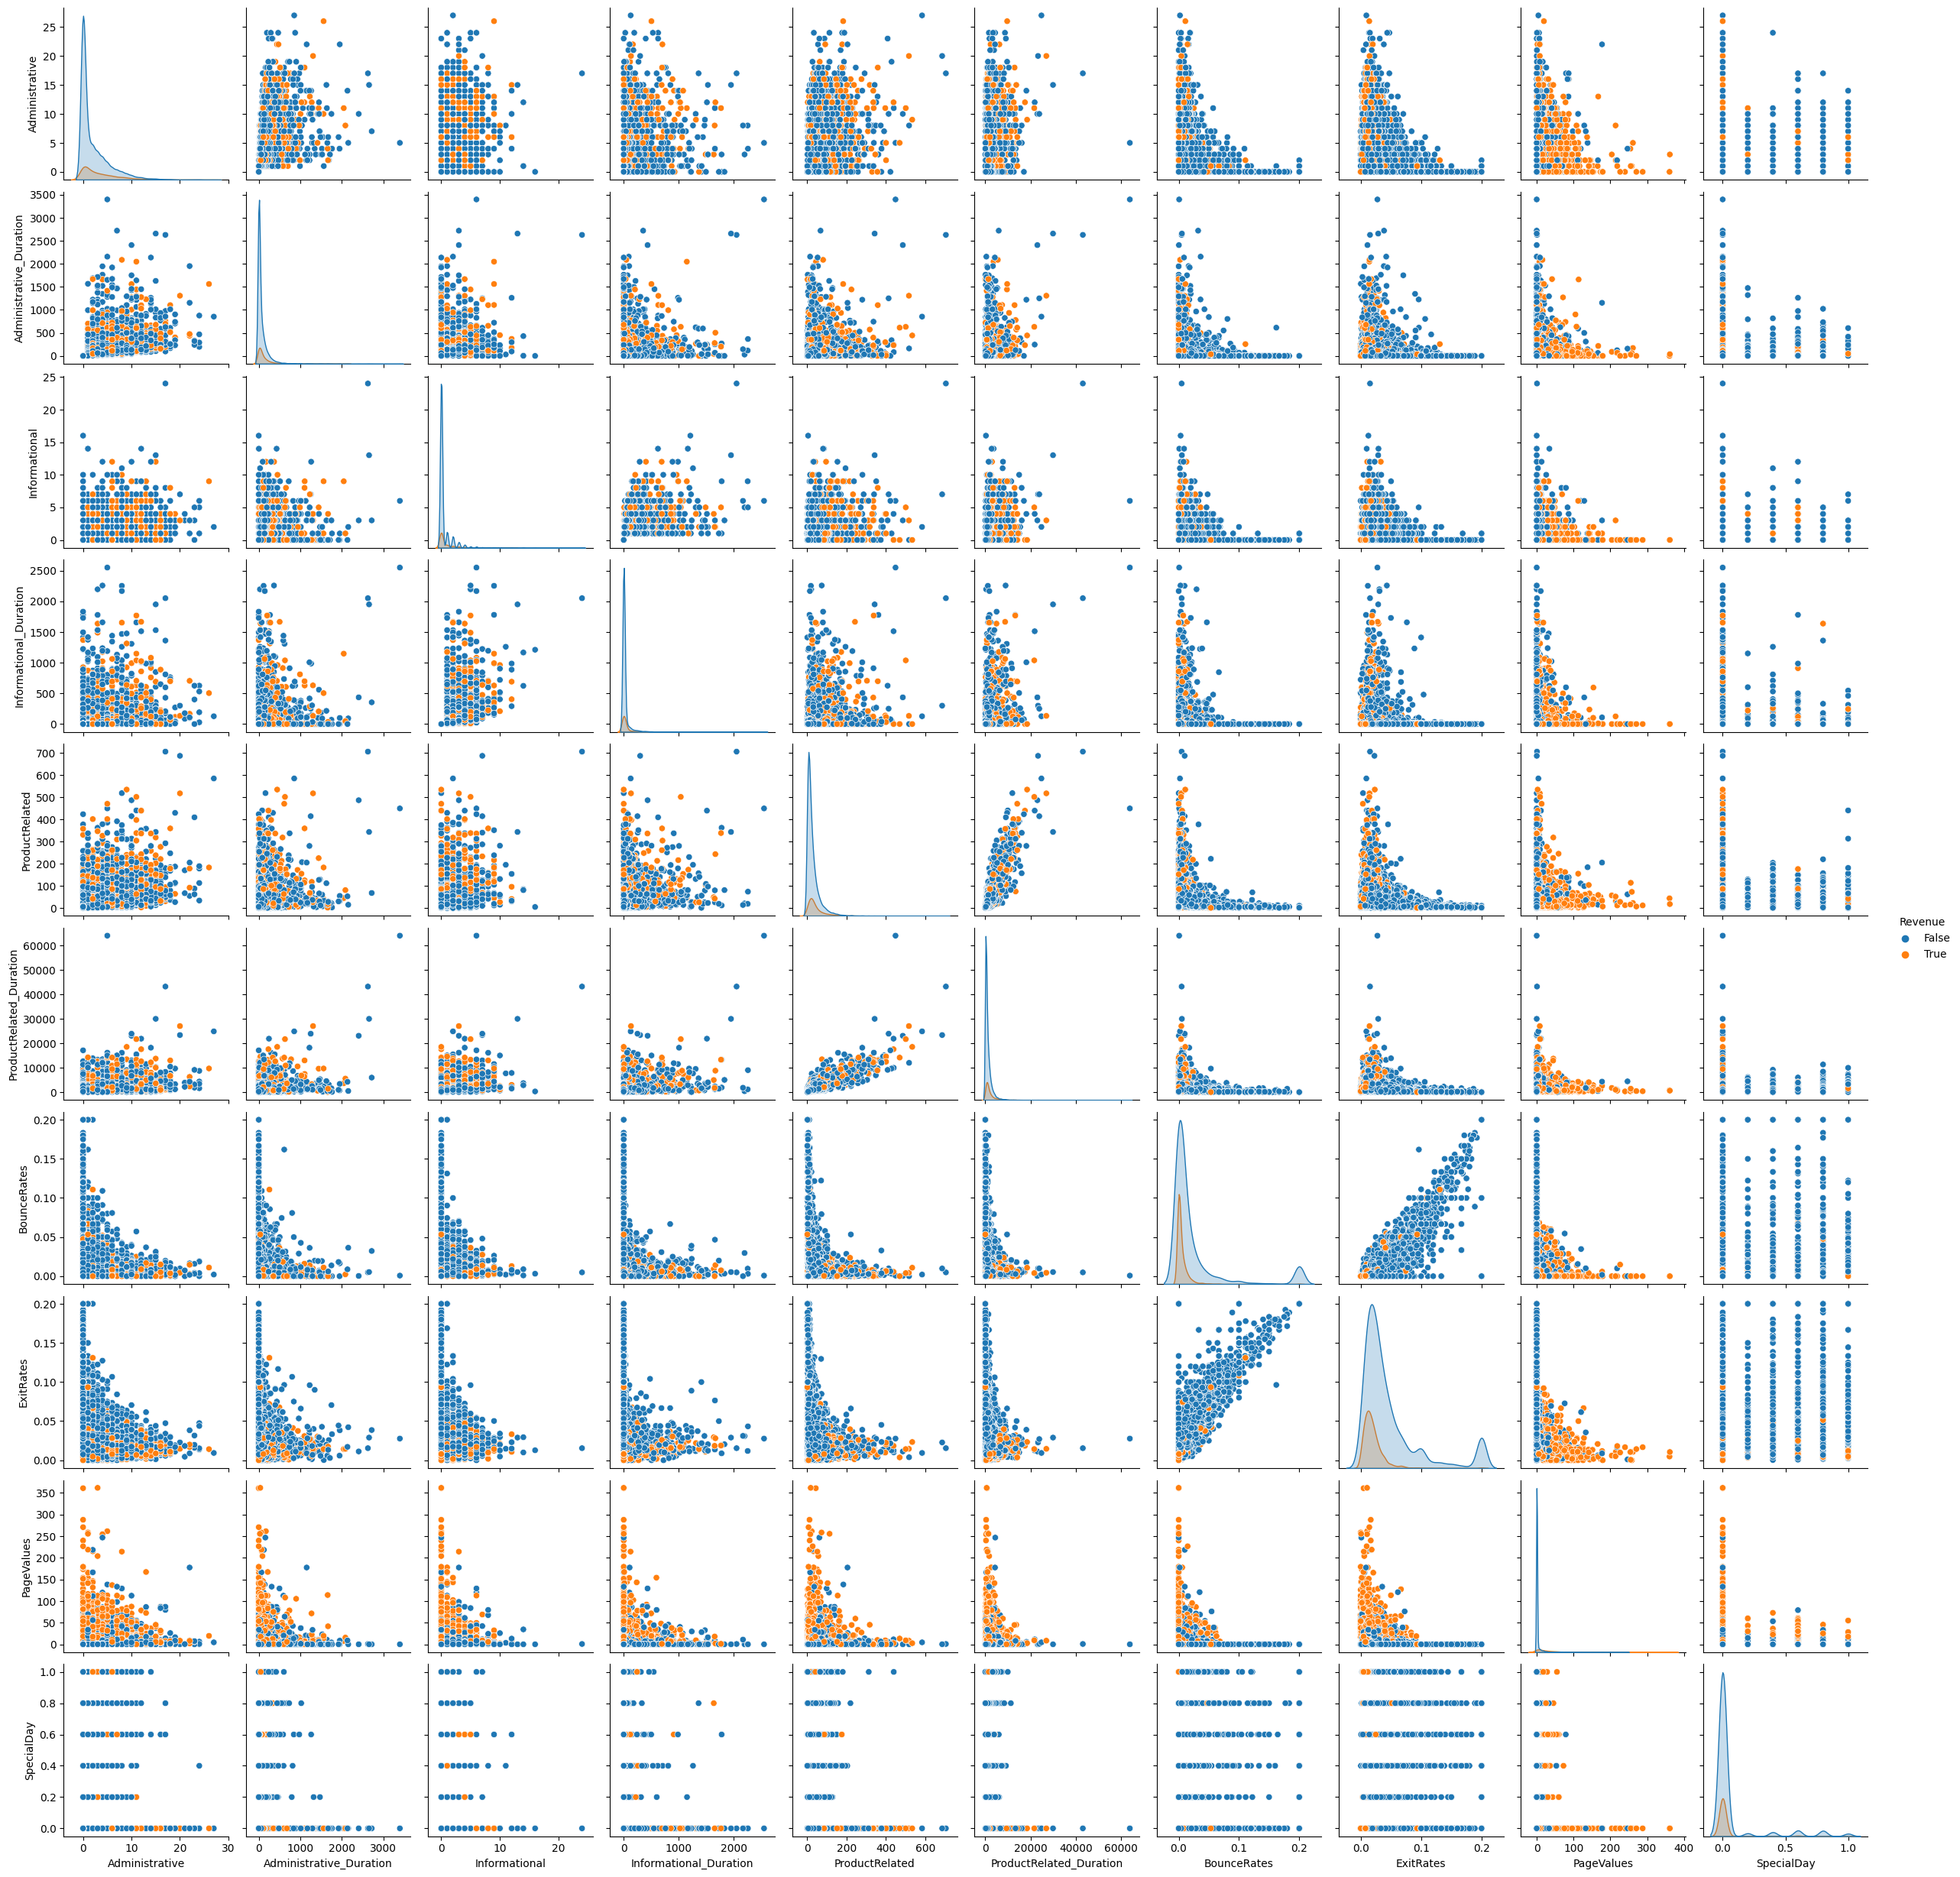

In [187]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[mult], diag_kind='kde',hue='Revenue')

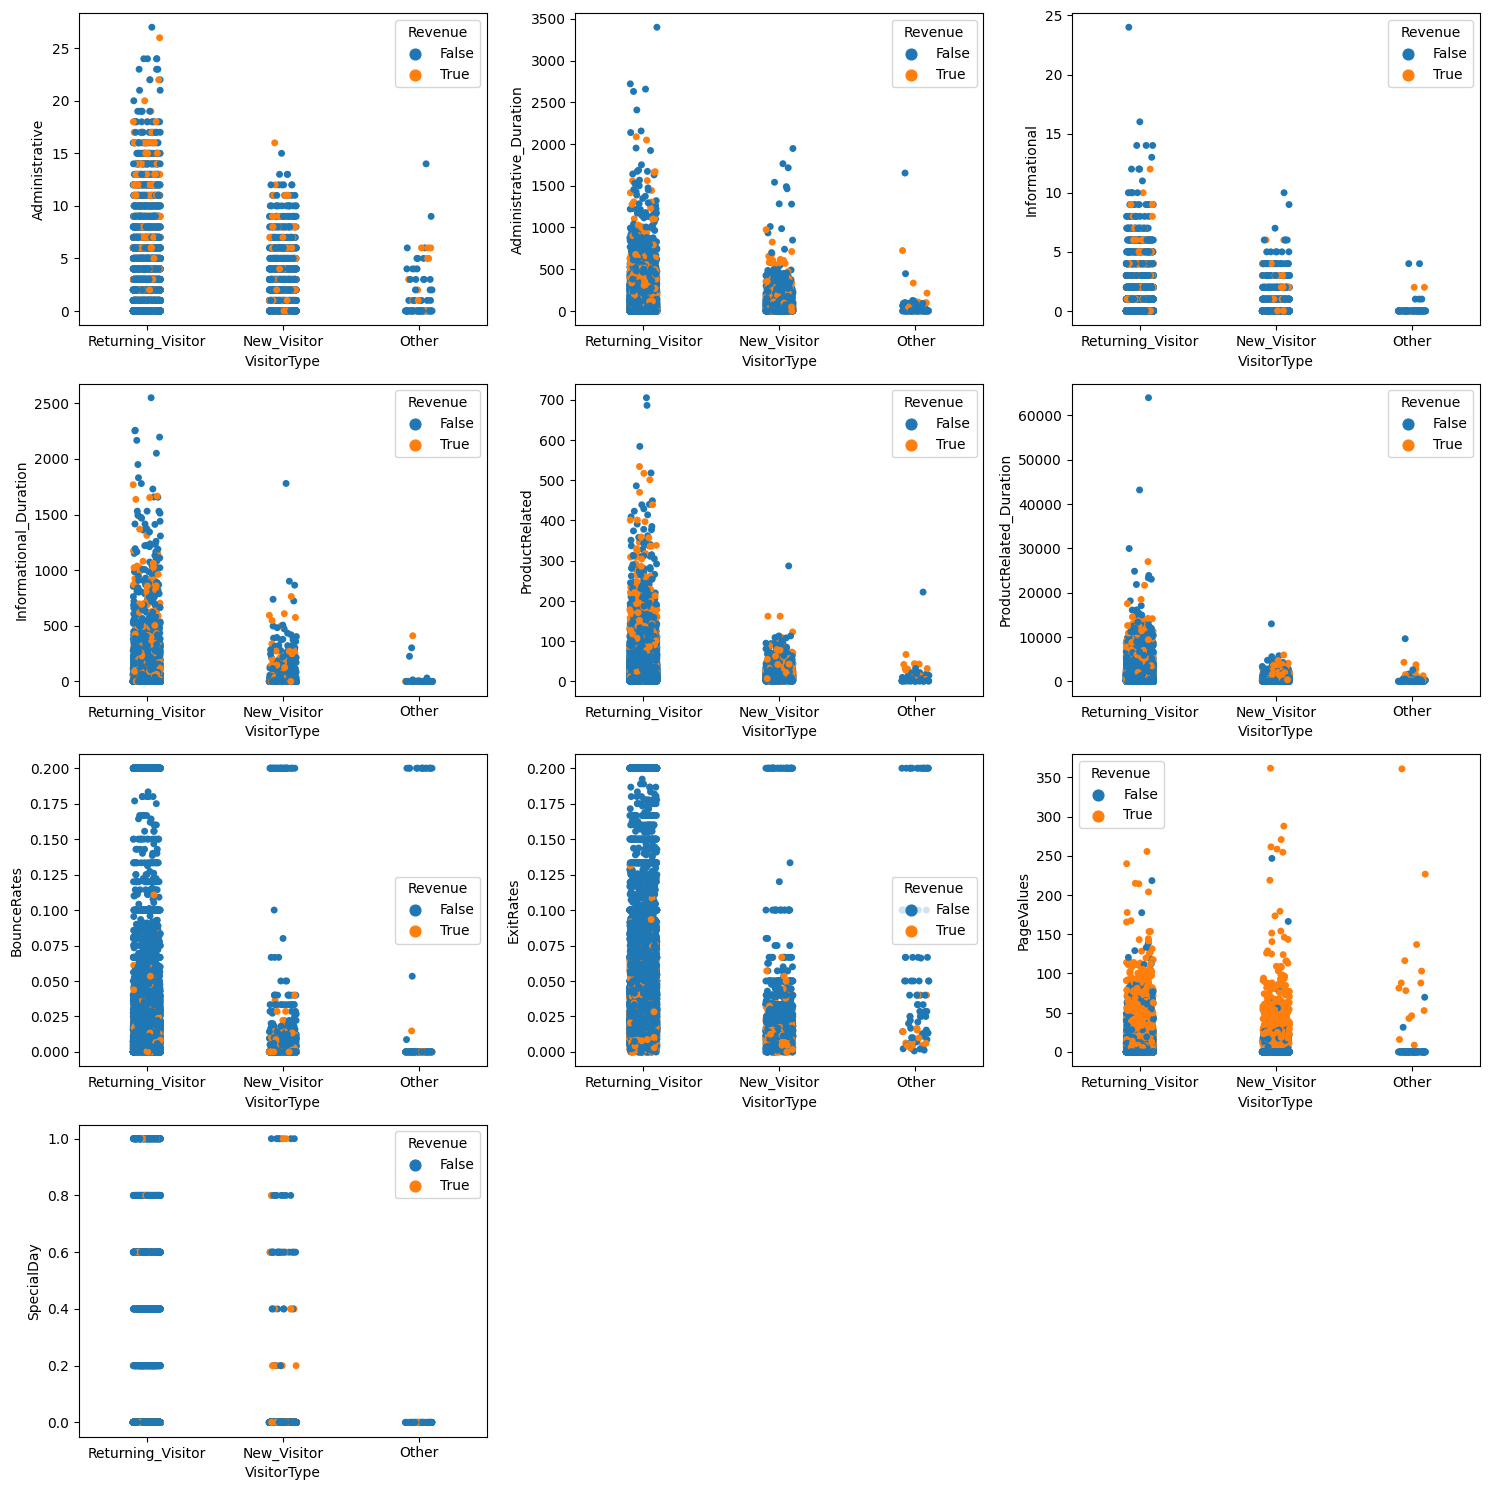

In [188]:
plt.figure(figsize=(15, 15))
for i in range(0, len(numerikal)): 
    plt.subplot(4, 3, i+1) 
    sns.stripplot(data=df, x='VisitorType', y=numerikal[i],hue='Revenue') 
    plt.tight_layout()

Bounce & Exit Rate memilki korelasi negatif bisa dilihat dari sebaran data diatas, berbanding terbalik dengan pagevalue.

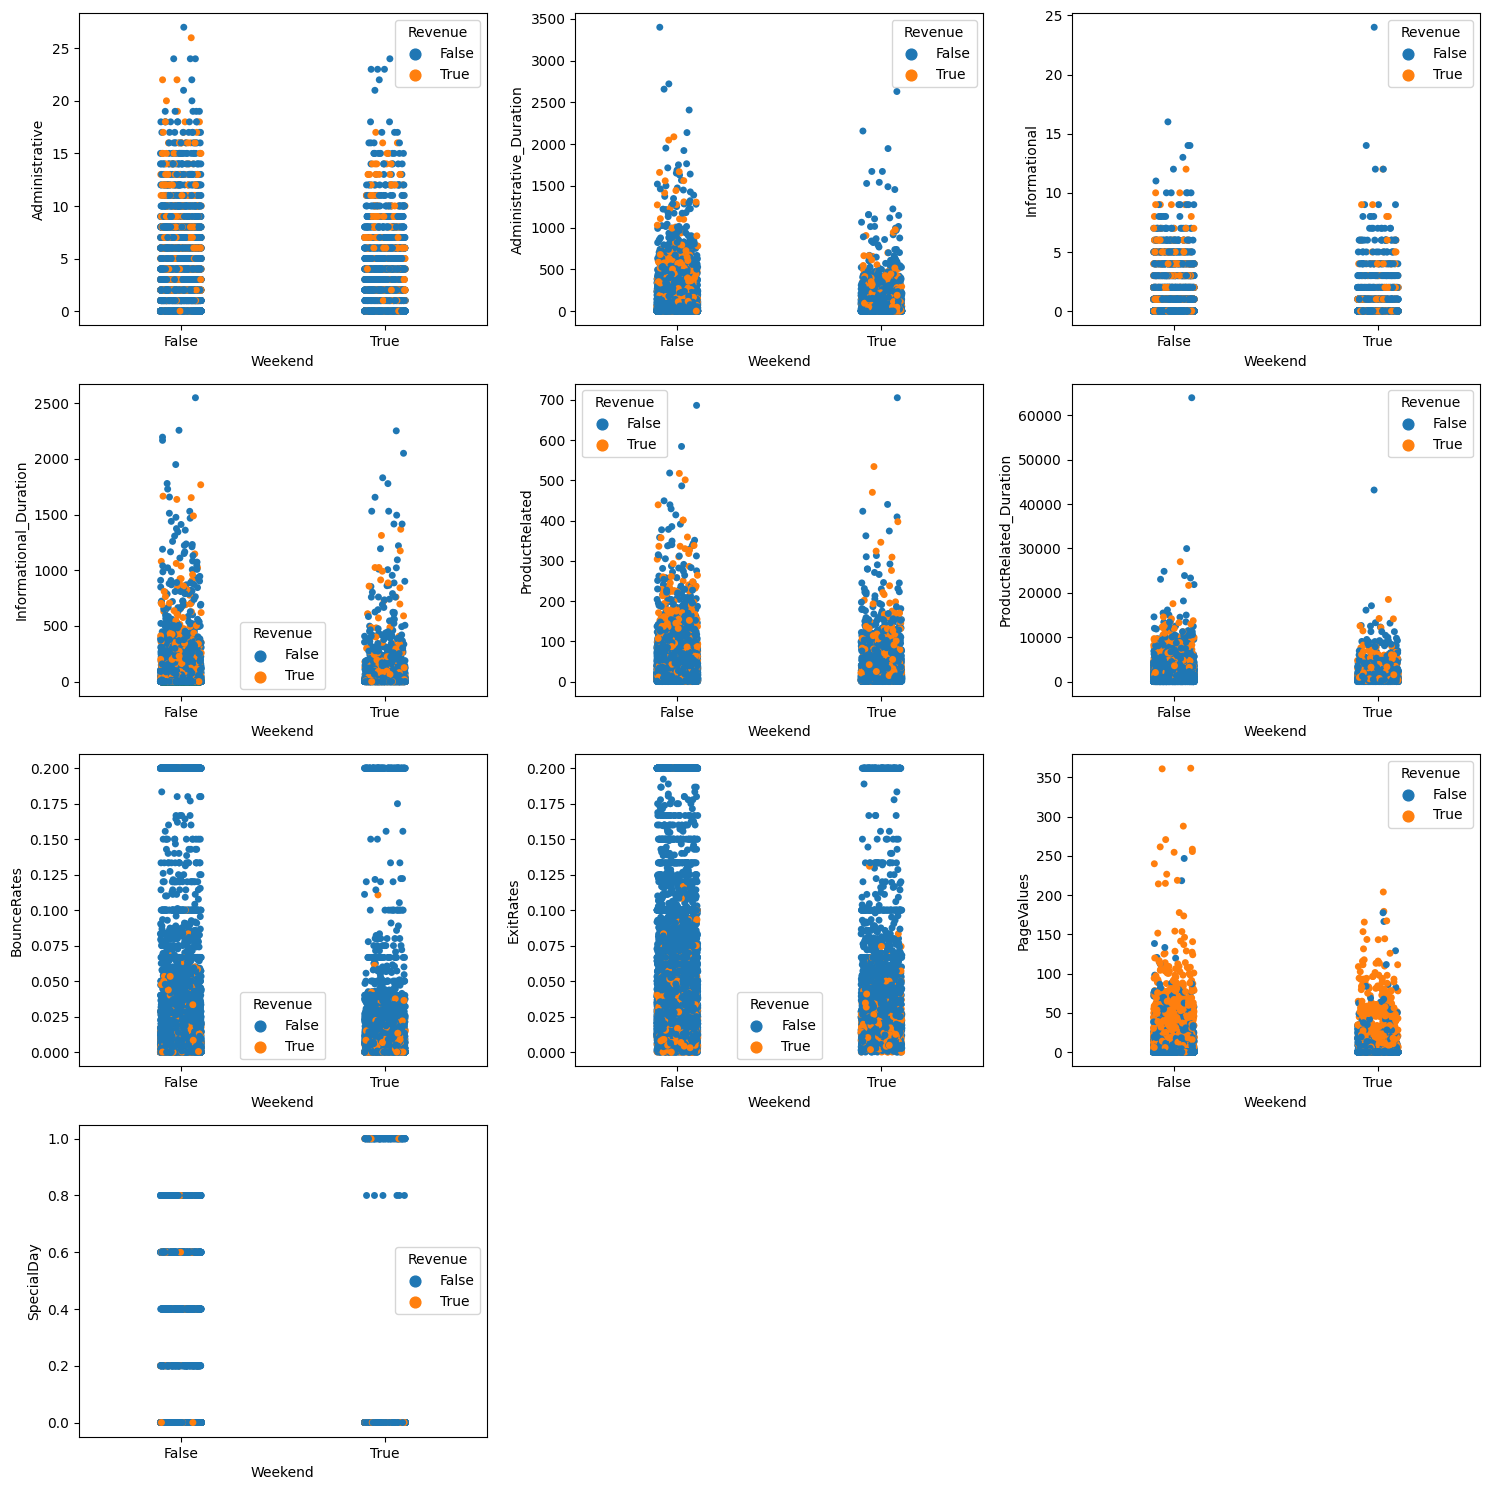

In [189]:
plt.figure(figsize=(15, 15))
for i in range(0, len(numerikal)): 
    plt.subplot(4, 3, i+1) 
    sns.stripplot(data=df, x='Weekend', y=numerikal[i],hue='Revenue') 
    plt.tight_layout()

Di weekdays, durasi penggunaan fitur memiliki angka yang lebih tinggi dibanding di weekend

# Business Insight

In [190]:
df['VisitorType'].value_counts()

Returning_Visitor    11072
New_Visitor           1785
Other                   89
Name: VisitorType, dtype: int64

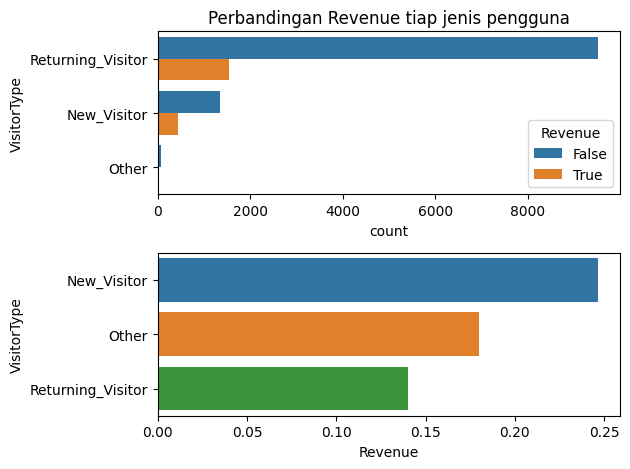

In [191]:
plt.subplot(2, 1, 1) 
plt.title('Perbandingan Revenue tiap jenis pengguna')
sns.countplot(data=df[kategori],y='VisitorType',hue='Revenue')

plt.subplot(2,1,2)
df_cv = df.groupby('VisitorType')['Revenue'].mean().reset_index()
sns.barplot(data=df_cv, y='VisitorType',x='Revenue')
plt.tight_layout()

Nilai conversion rate tertinggi (24,64%) berasal dari new visitor padahal kunjungan tertinggi (11.072 kunjungan) berasal dari returning visitor. Hal ini menunjukkan bahwa lebih banyak new visitor yang melakukan pembelian daripada returning visitor.  
  
Business Recommendation:   
Perusahaan perlu mempelajari hal-hal atau strategi apa saja yang sudah efektif dalam menarik pelanggan baru sebelumnya agar bisa ditingkatkan lagi. Selain itu, perlu dilakukan analisa data perilaku returning visitor untuk mengetahui lebih jauh alasan mereka melakukan pembelian atau tidak. Perusahaan juga bisa menawarkan promo-promo untuk pembeli yang melakukan repeat order atau program loyalty agar bisa meningkatkan minat pembelian pada returning visitor.


In [192]:
df['Weekend'].value_counts()

False    9929
True     3017
Name: Weekend, dtype: int64

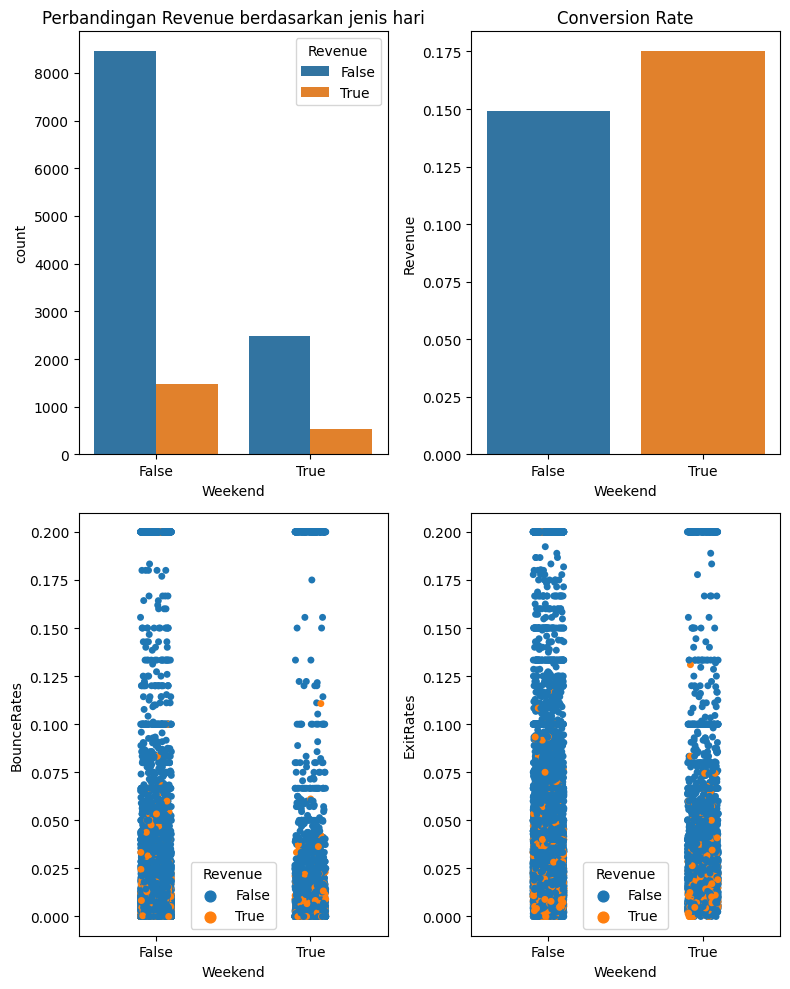

In [193]:
plt.figure(figsize=(8, 10))

plt.subplot(2, 2, 1)
plt.title('Perbandingan Revenue berdasarkan jenis hari')
sns.countplot(data=df[kategori],x='Weekend',hue='Revenue')

plt.subplot(2,2,2)
df_cv = df.groupby('Weekend')['Revenue'].mean().reset_index()
sns.barplot(data=df_cv, x='Weekend',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

plt.subplot(2,2,3)

sns.stripplot(data=df, x='Weekend', y='BounceRates',hue='Revenue') 
plt.tight_layout()

plt.subplot(2,2,4)
sns.stripplot(data=df, x='Weekend', y='ExitRates',hue='Revenue') 
plt.tight_layout()

Dapat dilihat, nilai conversion rate pada weekend (17,5%) lebih tinggi daripada weekdays(14,9%) yang berbanding terbalik dengan jumlah kunjungan yaitu pada weekdays sebanyak 9929 kunjungan dan pada weekend 3017 kunjungan. Hal ini dapat disebabkan oleh tingkat bounce rates dan exit rates yang lebih tinggi pada weekdays daripada weekend. Dimana bounce rates dan exit rates memiliki korelasi negatif dengan revenue.   
  
Business Recommendation:  
Memberikan promo weekdays yang diberikan pada pelanggan yang melakukan pembelian pada weekend atau memberitahukan promo yang berlaku pada  weekdays only untuk pelanggan yang sering berkunjung pada hari weekdays.
Optimalkan pengalaman user pada saat weekday untuk mengurangi bounce rates atau exit rates seperti menampilkan halaman-halaman relevan atau promo menarik.
Meningkatkan promosi pada saat weekend serta menganalisa strategi apa saja yang telah berhasil meningkatkan conversion rate pada saat weekend.
Perusahaan perlu memperluas data mengenai pelanggan agar dapat lebih dalam melakukan segmentasi pelanggan sehingga pemberian promo lebih relevan dan personal, misalnya pada jam berapa pada hari kerja jumlah tertinggi pelanggan melakukan kunjungan, sehingga perusahaan dapat melakukan pemeritahuan promo atau penawaran promo lebih efektif. 


In [194]:
df['Month'].value_counts()

May     3533
Nov     3151
Mar     1997
Dec     1816
Oct      574
Sep      464
Aug      461
Jul      451
June     308
Feb      191
Name: Month, dtype: int64

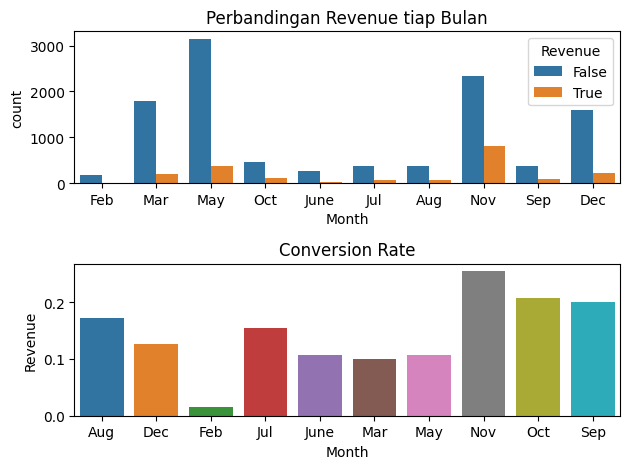

In [195]:
plt.subplot(2, 1, 1) 
plt.title('Perbandingan Revenue tiap Bulan')
sns.countplot(data=df,x='Month',hue='Revenue')

plt.subplot(2,1,2)
df_cv = df.groupby('Month')['Revenue'].mean().reset_index()
sns.barplot(data=df_cv, x='Month',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

Conversion paling tinggi terjadi pada bulan November (25%) dan terendah pada bulan Februari(1.5%), selain itu bulan Mei memiliki kunjungan yang paling tinggi (3533) pula akan tetapi konversinya (10%) relatif rendah dibanding bulan November.
Bulan Maret dan December juga memiliki kunjungan yang relatif tinggi yaitu Maret dan December akan tetapi conversion ratenya masih relatif rendah. (Maret: 1997 kunjungan dan 10% conversion rate, December:1816 kunjungan dan 12,5% conversion rate)  

  
- Fokuskan upaya pemasaran pada bulan November untuk meningkatkan konversi agar semakin tinggi. Selain itu, dapat pula dilakukan analisa lebih lanjut terhadap hal apa yang mempengaruhi tingkat konversi pada bulan November. 
- Optimalkan strategi konversi di Bulan Mei. Meskipun memiliki tingkat kunjungan yang tinggi, bulan Mei menunjukkan tingkat konversi yang relatif lebih rendah dibandingkan dengan bulan November. Untuk mengatasi perbedaan ini, bisnis sebaiknya menganalisis perilaku pengguna dan mengoptimalkan strategi konversi yang khusus ditujukan untuk pengunjung selama bulan Mei.   
- Bulan Oktober dan Mei juga perlu dioptimalkan lagi strategi pemasarannya karena jumlah kunjungan yang relatif banyak tapi conversion ratenya masih rendah.  dioptimalkan karena memiliki tingkat kunjungan yang relatif lebih tinggi tapi tingkat konversinya


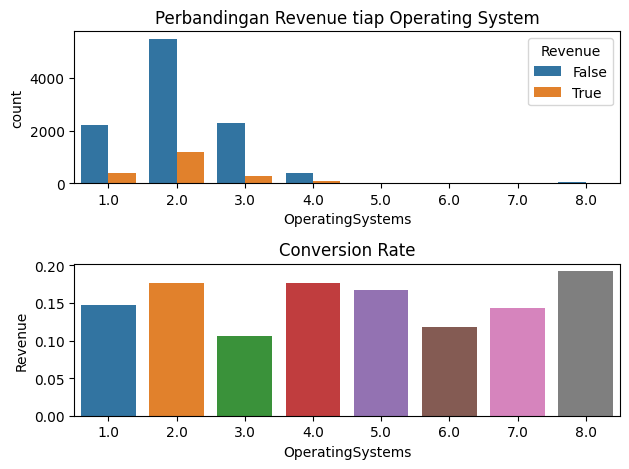

In [196]:
plt.subplot(2, 1, 1) 
plt.title('Perbandingan Revenue tiap Operating System')
sns.countplot(data=df[kategori],x='OperatingSystems',hue='Revenue')

plt.subplot(2,1,2)
df_cv = df.groupby('OperatingSystems')['Revenue'].mean().reset_index()
sns.barplot(data=df_cv, x='OperatingSystems',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

OperatingSystem : iOS (1.0), Windows (2.0), Android (3.0), MAC OS (4.0), Blackberry OS (5.0),  Chrome Os (6.0), Unix (7.0),  Linux (8.0), 
  
Business Insight:  
O.S yang paling banyak digunakan adalah O.S Windows. Berdasarkan grafik di atas, conversion rate tertinggi berada pada O.S  Linux akan tetapi pada saat mengecek jumlah kunjungan dapat dilihat bahwa kunjungannya sangat sedikit sehingga data ini tidak relevan.   
  
Business Recommendation:  
Memberi saran untuk tim developer agar menganalisa serta meningkatkan kompabilitas dan fungsionalitas di berbagai operating system agar kinerja situs web semakin baik. 


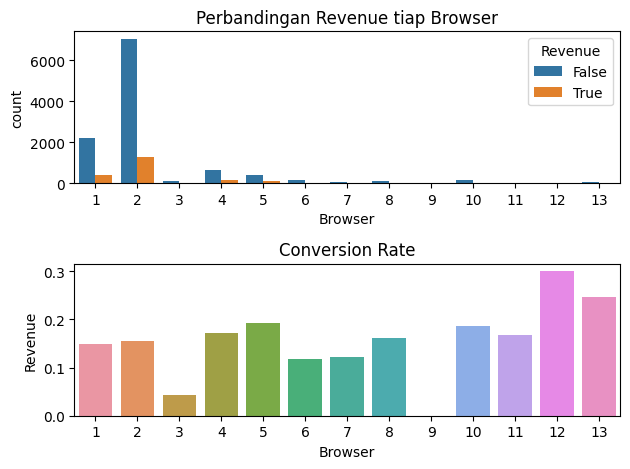

In [197]:
plt.subplot(2, 1, 1) 
plt.title('Perbandingan Revenue tiap Browser')
sns.countplot(data=df[kategori],x='Browser',hue='Revenue')

plt.subplot(2,1,2)
df_cv = df.groupby('Browser')['Revenue'].mean().reset_index()
sns.barplot(data=df_cv, x='Browser',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

Browser :  
Safari (1), Google Chrome (2), Internet Explorer (3), Mozilla Firefox (4), Microsoft Edge (5),  Samsung Internet (6), Maxthon Browser (7) , Brave (8), Vivaldi (9)  
  
Business Insight:   
Tipe browser yang paling banyak digunakan adalah browser google chrome. Conversion rate tertinggi berasal dari browser Opera. Akan tetapi, browser opera memiliki nilai kunjungan yang sangat rendah sehingga data kurang relevan. 


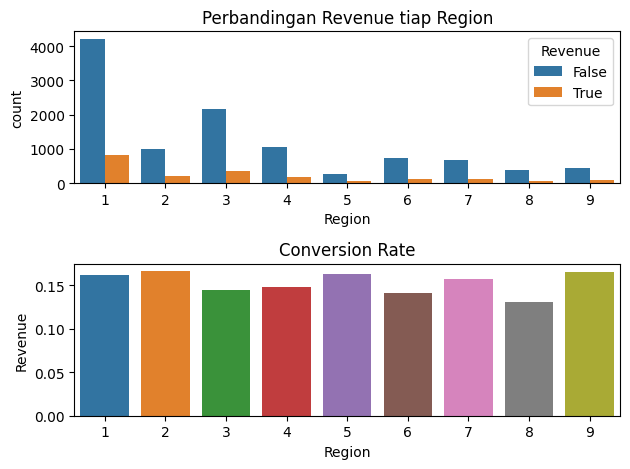

In [198]:
plt.subplot(2, 1, 1) 
plt.title('Perbandingan Revenue tiap Region')
sns.countplot(data=df[kategori],x='Region',hue='Revenue')

plt.subplot(2,1,2)
df_cv = df.groupby('Region')['Revenue'].mean().reset_index()
sns.barplot(data=df_cv, x='Region',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

Region : Jakarta (1), Bandung (2), Surabaya (3), Medan (4), Batam (5), Makassar (6), Tangerang (7), Yogyakarta(8), Semarang (9). 
  
Business Insight (Region) :   
Berdasarkan grafik diatas diketahui bahwa kunjungan terbanyak terdapat pada kota Jakarta dan Surabaya. Nilai konversi rate tertinggi terdapat pada region Bandung yaitu sebesar 16,63% dan terendah pada Semarang yaitu 13,12%.  
  
Business Recommendation :  
Melakukan analisa lebih lanjut apa yang menyebabkan nilai conversion rate rendah pada beberapa regional. Memahami karakteristik market setiap regional untuk menyesuaikan strategi bisnis yang dapat membantu memaksimalkan konversi setiap regional.

<AxesSubplot:xlabel='ProductRelated', ylabel='Revenue'>

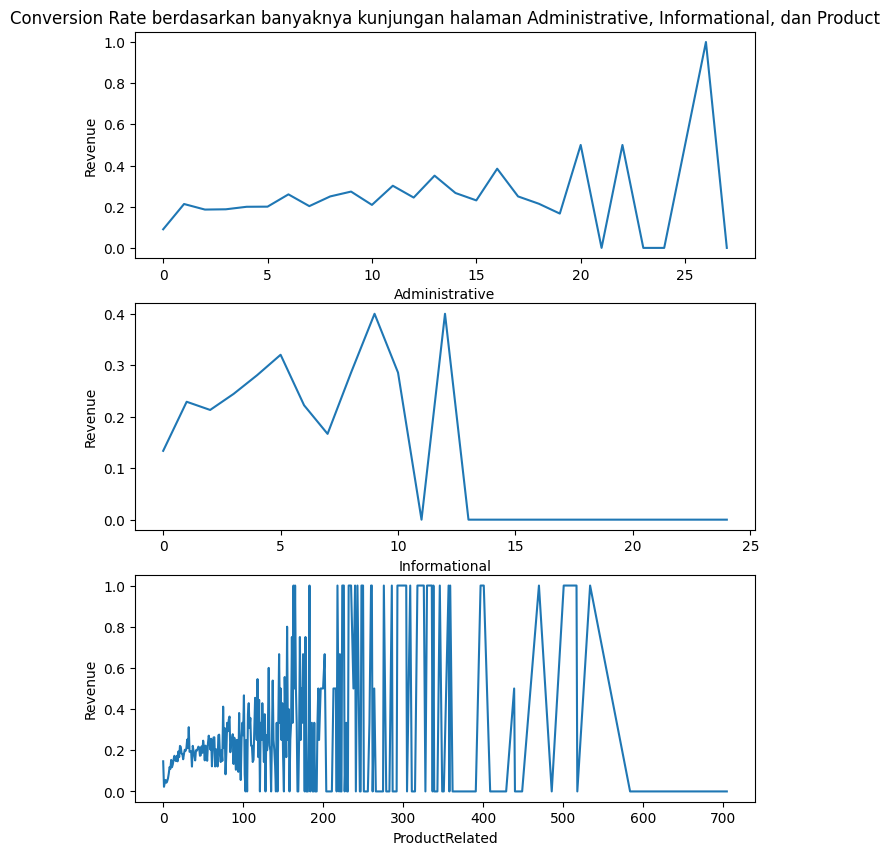

In [205]:
plt.figure(figsize=(8, 10))
plt.subplot(3,1,1)
plt.title('Conversion Rate berdasarkan banyaknya kunjungan halaman Administrative, Informational, dan Product')
df_conv_ad = df.groupby('Administrative')['Revenue'].mean().reset_index()
sns.lineplot(data=df_conv_ad, y='Revenue',x='Administrative')

plt.subplot(3,1,2)
df_conv = df.groupby('Informational')['Revenue'].mean().reset_index()
sns.lineplot(data=df_conv, x='Informational',y='Revenue')

plt.subplot(3,1,3)
df_conv = df.groupby('ProductRelated')['Revenue'].mean().reset_index()
sns.lineplot(data=df_conv, x='ProductRelated',y='Revenue')

Business insight:  
Untuk data administrative, product related dan juga informational terdapat trend positif dimana semakin tinggi nilai pada sumbu X maka semakin tinggi pula tingkat konversinya. Akan tetapi, keberadaan outlier membuat trend grafik menjadi tidak begitu terlihat.  
  
Business Recommendation:  
Melakukan analisa lebih lanjut tentang halaman apa saja yang berhasil membuat pelanggan melakukan konversi agar kemudian dapat membuat strategi bisnis dan pemsaran yang lebih efektif.


<AxesSubplot:xlabel='ExitRates', ylabel='Revenue'>

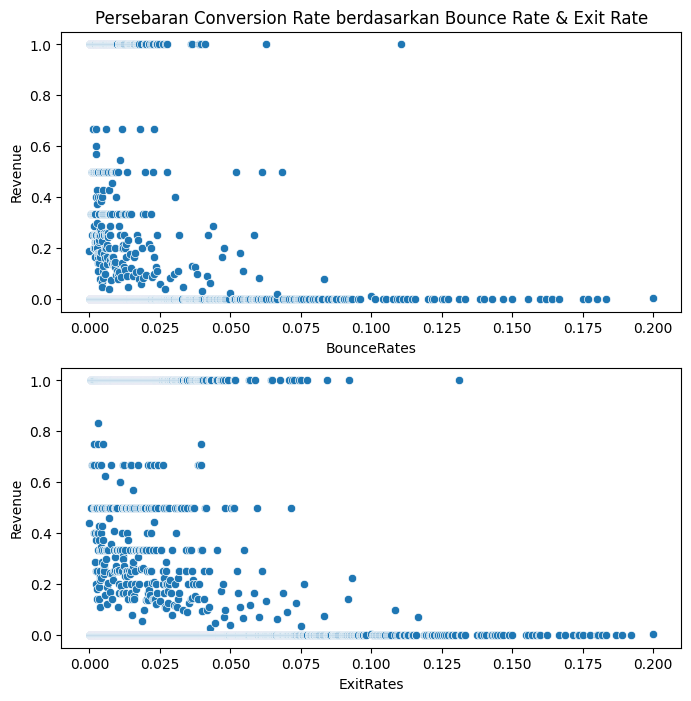

In [200]:
plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.title('Persebaran Conversion Rate berdasarkan Bounce Rate & Exit Rate')
df_conv = df.groupby('BounceRates')['Revenue'].mean().reset_index()
sns.scatterplot(data=df_conv, x='BounceRates',y='Revenue')

plt.subplot(2,1,2)
df_conv = df.groupby('ExitRates')['Revenue'].mean().reset_index()
sns.scatterplot(data=df_conv, x='ExitRates',y='Revenue')

Business Insight:  
Semakin tinggi bounce rates dan exit rates, maka tingkat konversi semakin rendah.  
  
Business Recommendation:  
Dapat melakukan analisa lebih lanjut tentang alasan yang dapat menyebabkan terjadinya hal tersebut, misalnya foto produk yang kurang menarik, review atau rating pelanggan yang buruk dan sebagainya. 


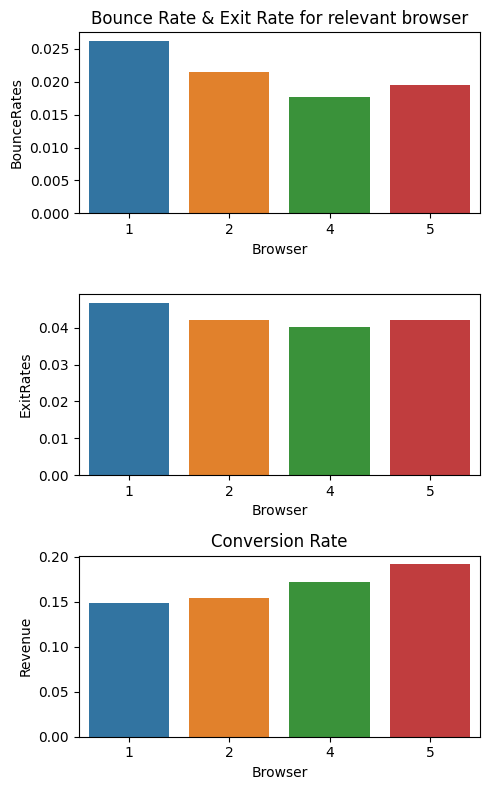

In [201]:
browser_relevant = [1,2,4,5]

plt.figure(figsize=(5, 8))

plt.subplot(3,1,1)
plt.title('Bounce Rate & Exit Rate for relevant browser')
df_bnc = df[df['Browser'].isin(browser_relevant)].groupby('Browser')['BounceRates'].mean().reset_index()
sns.barplot(data=df_bnc, x='Browser',y='BounceRates')

plt.subplot(3,1,2)
df_ex = df[df['Browser'].isin(browser_relevant)].groupby('Browser')['ExitRates'].mean().reset_index()
sns.barplot(data=df_ex, x='Browser',y='ExitRates')

plt.subplot(3,1,3)
df_br = df[df['Browser'].isin(browser_relevant)].groupby('Browser')['Revenue'].mean().reset_index()
sns.barplot(data=df_br, x='Browser',y='Revenue')
plt.title('Conversion Rate')
plt.tight_layout()

Browser : Safari (1), Google Chrome (2), Internet Explorer (3), Mozilla Firefox (4), Microsoft Edge (5),  Samsung Internet (6), Maxthon Browser (7) , Brave (8), Vivaldi (9) UC Browser (10), DuckDuckGo (11),  Opera (12), Netscape Navigator (13).  
  
Business insight :  
dapat kita lihat pada browser Safari (1), Google Chrome (2), dan browser Mozilla Firefox (4) semakin tinggi bounce rate dan exit rates maka semakin rendah pula conversion ratenya. Akan tetapi browser Microsoft Edge (5) yang memiliki nilai  exit rates dan bounce rates lebih tinggi daripada browser Mozilla Firefox (4) menunjukkan nilai conversion rate yang lebih tinggi.  
  
Business recommendation:  
Perlu dilakukan analisa lebih lanjut mengenai hal-hal yang menyebabkan exit dan bounce rates. 	


In [202]:
df_new = df

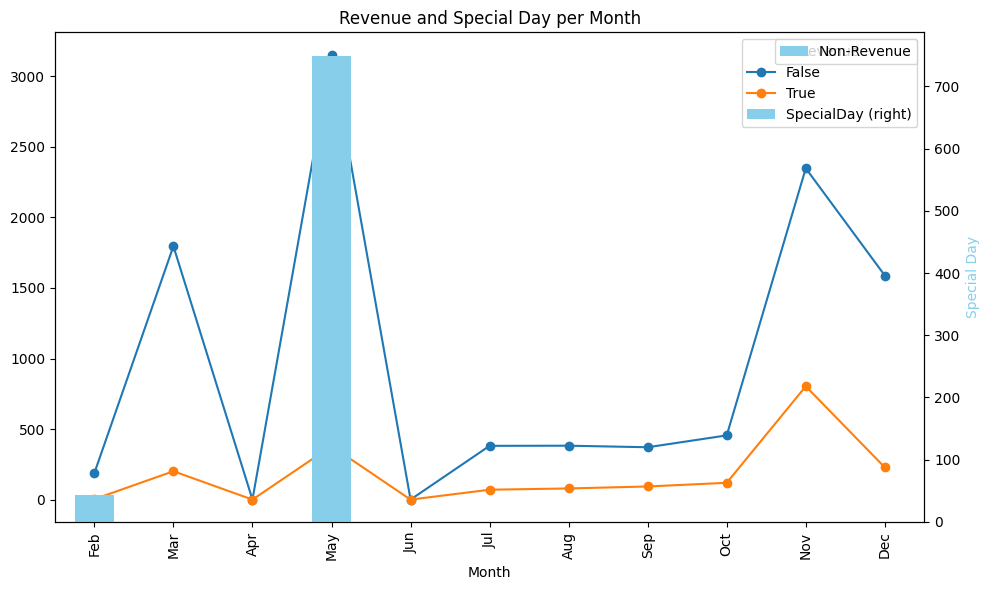

In [203]:
df_new['Month'] = pd.Categorical(df_new['Month'], categories=['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

revenue_pivot = df_new.pivot_table(index='Month', columns='Revenue', aggfunc='size', fill_value=0)

specialday_pivot = df_new.pivot_table(index='Month', values='SpecialDay', aggfunc='sum')
plt.figure(figsize=(10, 6))
revenue_pivot.plot(kind='line', marker='o', ax=plt.gca())
specialday_pivot.plot(kind='bar', color='skyblue', ax=plt.gca(), secondary_y=True)

plt.title('Revenue and Special Day per Month')
plt.xlabel('Month')
plt.ylabel('Count of Revenue')
plt.ylabel('Special Day', color='skyblue')
plt.legend(['Non-Revenue', 'Revenue', 'Special Day'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Business Insight :  

- Hubungan antara Special Day dan Revenue: Terlihat bahwa bulan-bulan dengan jumlah special day yang lebih tinggi, seperti Mei cenderung memiliki jumlah revenue yang lebih tinggi. Hal ini menunjukkan adanya korelasi antara special day dan aktivitas kunjungan untuk pembelian. Kehadiran special day seperti hari libur atau acara promosi khusus dapat memengaruhi tingkat penjualan.

- Polanya Tidak Konsisten: Walaupun terdapat bulan-bulan dengan jumlah revenue yang tinggi, namun terdapat bulan-bulan lain yang memiliki jumlah revenue yang lebih rendah atau bahkan nol. Hal ini menunjukkan adanya fluktuasi dalam performa penjualan dari bulan ke bulan, yang mungkin dipengaruhi oleh banyak faktor seperti tren pasar, perubahan perilaku konsumen, atau strategi pemasaran yang berbeda.  

- Pada bulan Mei, hampir semua kunjungan

<AxesSubplot:title={'center':'Perbandingan conversion rate Special Day bulan Mei'}, xlabel='SpecialDay', ylabel='Revenue'>

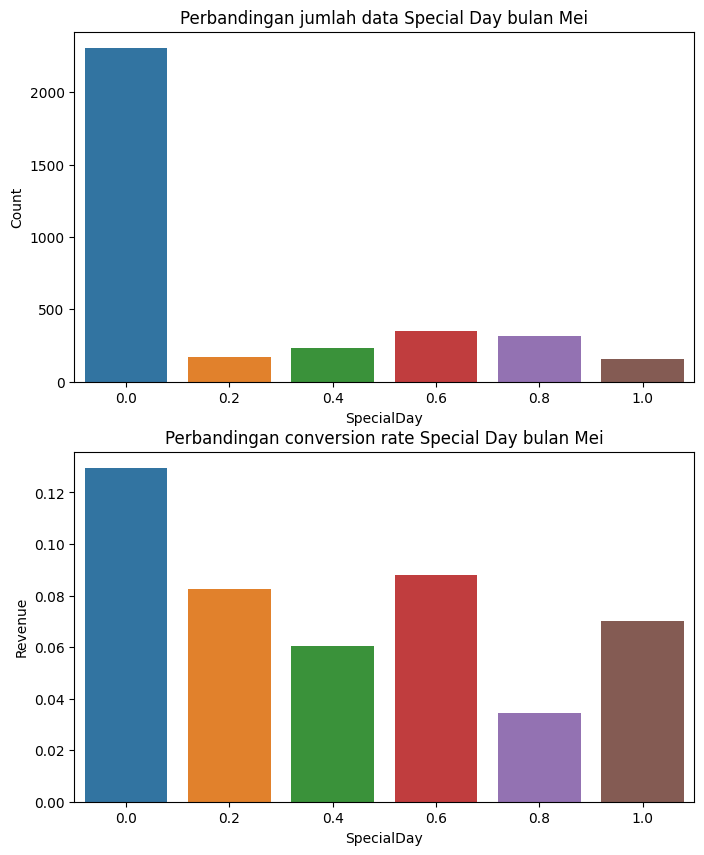

In [204]:
plt.figure(figsize=(8, 10))

df_conv = df[df['Month'] == 'May']['SpecialDay'].astype('object').value_counts().reset_index()
df_conv.columns = ['SpecialDay','Count']


plt.subplot(2,1,1)
plt.title('Perbandingan jumlah data Special Day bulan Mei')
sns.barplot(data=df_conv, x='SpecialDay',y='Count')

plt.subplot(2,1,2)
plt.title('Perbandingan conversion rate Special Day bulan Mei')
df_conv = df[df['Month'] == 'May'].groupby('SpecialDay')['Revenue'].mean().reset_index()
sns.barplot(data=df_conv, x='SpecialDay',y='Revenue')

Business Insight :  
- Pada bulan Mei, pengguna yang beraktivitas mendekati special day cukup banyak. Hal ini mungkin yang memengaruhi banyaknya jumlah pengguna saat bulan Mei. Namun, conversion rate saat mendekati special day masi lebih rendah dibanding hari biasa. Kemungkinan pengguna hanya melihat-lihat barang tanpa melakukan pembelian.  
- Selain itu, pada saat menjelang special day terdapat peningkatan conversion rate pada skala 0.6

  
Business Recommendation :  
- Pada bulan Mei, adakan banyak promo untuk memaksimalkan banyaknya pengguna.  
- Melakukan analisa lebih lanjut terhadap faktor yang mempengaruhi peningkatan 	conversion rate pada skala 0.6 agar dapat mengoptimalkan strategi pemasaran selanjutnya seperti menambahkan promo menjelang hari spesial, pemasangan iklan atau rekomendasi produk sesuai hari spesial dan lain- lain. 